## 整理Google Trends 感冒搜尋趨勢數據

In [3]:
import pandas
df  = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/multiTimeline.csv', skiprows=[0,1])

In [5]:
df.columns = ['週', '感冒']
df.head()

,週,感冒
0,2014-07-06,28
1,2014-07-13,34
2,2014-07-20,27
3,2014-07-27,29
4,2014-08-03,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
週     261 non-null object
感冒    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [8]:
df['週'] = pandas.to_datetime(df['週'], format= '%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
週     261 non-null datetime64[ns]
感冒    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


Populating the interactive namespace from numpy and matplotlib


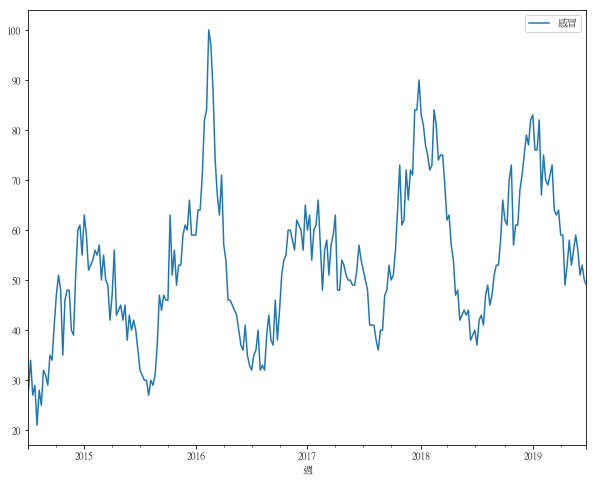

In [13]:
%pylab inline

import matplotlib
matplotlib.rcParams['font.family'] = 'PMingLiU'
mpl.rcParams['font.sans-serif'] = ['PMingLiU']

df.plot(x = '週', y ='感冒', kind = 'line', figsize = [10,8])

In [32]:
df.head()

,週,感冒
0,2014-07-06,28
1,2014-07-13,34
2,2014-07-20,27
3,2014-07-27,29
4,2014-08-03,21


## 整理CDC 流感併發重症數據

In [14]:
import pandas
flu = pandas.read_csv('https://od.cdc.gov.tw/eic/Age_County_Gender_487a.csv')

In [18]:
stat = flu.groupby(['發病年份', '發病月份'])['確定病例數'].sum().to_frame()

In [21]:
stat.reset_index(level=0, inplace=True)

In [23]:
stat.reset_index(inplace=True)

In [26]:
stat['發病日期'] = stat['發病年份'].astype(str) + '-' + stat['發病月份'].astype(str) + '-01'

In [28]:
stat['發病日期'] = pandas.to_datetime(stat['發病日期'], format = '%Y-%m-%d')

In [29]:
stat.head()

,發病月份,發病年份,確定病例數,發病日期
0,1,2003,6,2003-01-01
1,2,2003,3,2003-02-01
2,3,2003,1,2003-03-01
3,11,2003,2,2003-11-01
4,12,2003,4,2003-12-01


In [33]:
flu_stat = stat[stat['發病日期'] > '2014-07-01']

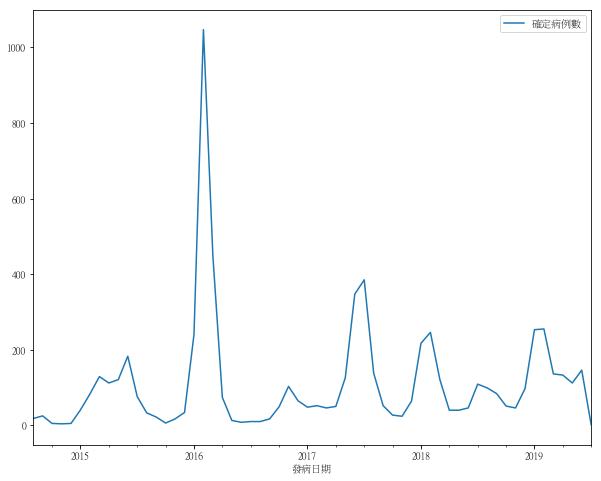

In [34]:
flu_stat.plot(x = '發病日期', y = '確定病例數',kind = 'line', figsize = [10,8])

In [41]:
df['發病日期'] = df['週'].dt.year.astype(str) + '-' + df['週'].dt.month.astype(str) + '-' + '01'

In [44]:
df = df.groupby('發病日期')['感冒'].sum().to_frame()
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-7-01,118
2014-8-01,137


In [46]:
df.index = pandas.to_datetime(df.index, format= '%Y-%m-%d')

In [47]:
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-07-01,118
2014-08-01,137


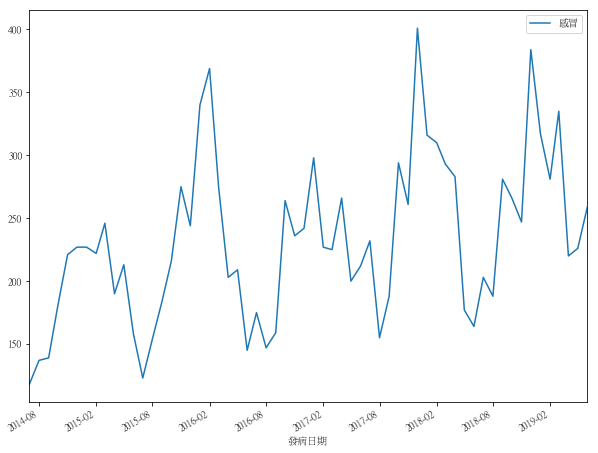

In [49]:
df.plot(kind = 'line', figsize = [10,8])

In [52]:
flu_stat = flu_stat[['發病日期', '確定病例數']] 
flu_stat.set_index('發病日期' , inplace=True)
flu_stat.head()

,確定病例數
發病日期,
2014-08-01,18
2014-09-01,25
2014-10-01,5
2014-11-01,4
2014-12-01,5


In [54]:
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-07-01,118
2014-08-01,137


## 交叉分析兩者資料

In [55]:
m = pandas.merge(flu_stat, df, left_index=True, right_index=True)

In [56]:
m.head()

,確定病例數,感冒
發病日期,,
2014-08-01,18,137
2014-09-01,25,139
2014-10-01,5,181
2014-11-01,4,221
2014-12-01,5,227


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1219199b0>,
      dtype=object)

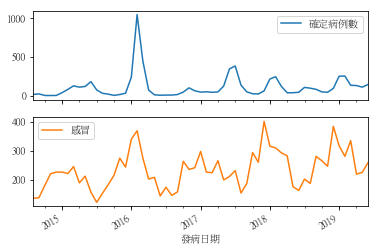

In [57]:
m.plot(subplots=True)

In [58]:
m.corr()

,確定病例數,感冒
確定病例數,1.000000,0.402567
感冒,0.402567,1.000000


In [61]:
m['ma3'] = m['感冒'].rolling(window = 3).mean()

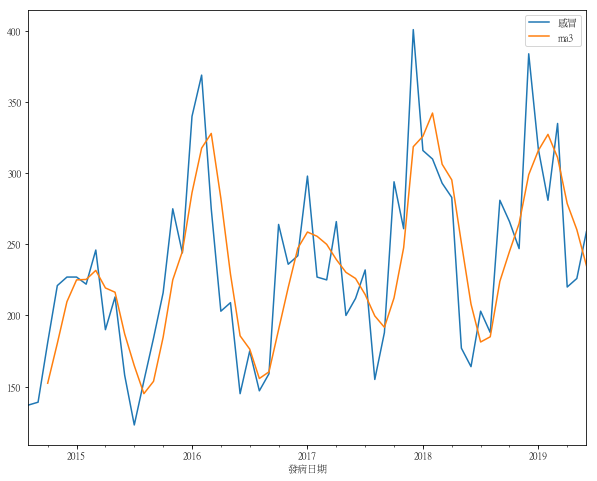

In [62]:
m[['感冒','ma3']].plot(kind = 'line', figsize = [10,8])

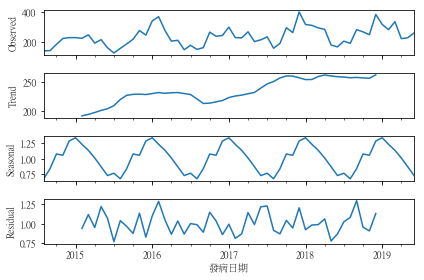

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(m['感冒'], model='mul')
result.plot();

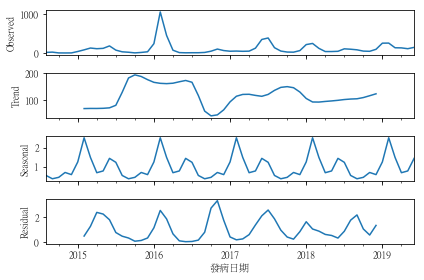

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(m['確定病例數'], model='mul')
result.plot();

## 建立時間序列預測模型 (Google Trends)

In [68]:
import pandas
df  = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/multiTimeline.csv', skiprows=[0,1])

In [69]:
df.columns = ['週', '感冒']
df.head()

,週,感冒
0,2014-07-06,28
1,2014-07-13,34
2,2014-07-20,27
3,2014-07-27,29
4,2014-08-03,21


In [70]:
df['週'] = pandas.to_datetime(df['週'], format= '%Y-%m-%d')

In [71]:
df.set_index('週', inplace=True)

In [95]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM



In [96]:
dataset = df['感冒'].values

In [97]:
len(dataset)

261

In [98]:
261 * 0.8

208.8

In [99]:
dataset[0:8]

array([28, 34, 27, 29, 21, 28, 25, 32])

In [100]:
dataset[8]

31

In [101]:
X_train = []
y_train = []
for i in range(8, 208):
    X_train.append(dataset[i-8:i])
    y_train.append(dataset[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [102]:
X_train.shape

(200, 8)

In [103]:
X_train2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [104]:
X_train2.shape

(200, 8, 1)

In [105]:
y_train.shape

(200,)

In [112]:
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [113]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [114]:

# Fitting the RNN to the Training set
history = regressor.fit(X_train2, y_train, epochs = 100, batch_size = 3)

Epoch 1/100
200/200 [==============================] - 2s 12ms/step - loss: 2423.2006
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 1812.3416
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 1568.2213
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 1334.2011
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 1160.2268
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 1000.8062
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 851.4891
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 747.7109
Epoch 9/100
200/200 [==============================] - 1s 4ms/step - loss: 652.6282
Epoch 10/100
200/200 [==============================] - 1s 4ms/step - loss: 568.5222
Epoch 11/100
200/200 [==============================] - 1s 5ms/step - loss: 498.5750
Epoch 12/100
200/200 [==============================] - 1s 5ms/step

200/200 [==============================] - 1s 5ms/step - loss: 50.3764
Epoch 99/100
200/200 [==============================] - 1s 5ms/step - loss: 50.3903
Epoch 100/100
200/200 [==============================] - 1s 5ms/step - loss: 59.1254


In [115]:
predicted = regressor.predict(X_train2)

In [116]:
#predicted

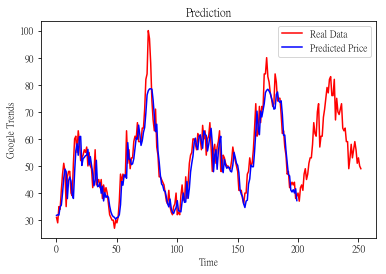

In [119]:
import matplotlib.pyplot as plt
plt.plot(dataset[8:],   color = 'red', label = 'Real Data')
plt.plot(predicted, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Trends')
plt.legend()
plt.show()

In [120]:
X_test = []
y_test = []
for i in range(208, 261):
    X_test.append(dataset[i-8:i])
    y_test.append(dataset[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [121]:
X_test2 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [123]:
X_test2.shape

(53, 8, 1)

In [132]:
predicted2 = regressor.predict(X_test2)

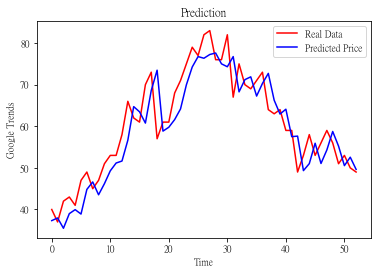

In [133]:
import matplotlib.pyplot as plt
plt.plot(dataset[208:],   color = 'red', label = 'Real Data')
plt.plot(predicted2, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Trends')
plt.legend()
plt.show()

In [137]:
X_total = []
for i in range(8, 261):
    X_total.append(dataset[i-8:i])
    
X_total = np.array(X_total)
#X_total.shape
X_total = np.reshape(X_total, (X_total.shape[0], X_total.shape[1], 1))

In [138]:
predicted3 = regressor.predict(X_total)

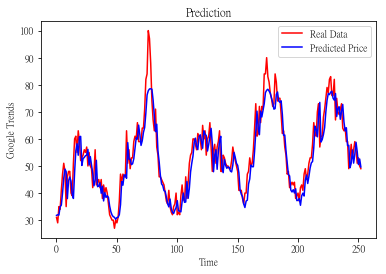

In [139]:
import matplotlib.pyplot as plt
plt.plot(dataset[8:],   color = 'red', label = 'Real Data')
plt.plot(predicted3, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Trends')
plt.legend()
plt.show()

## 建立時間序列預測模型 (CDC Data)

In [140]:
import pandas
flu = pandas.read_csv('https://od.cdc.gov.tw/eic/Age_County_Gender_487a.csv')

In [141]:
stat = flu.groupby(['發病年份', '發病月份'])['確定病例數'].sum().to_frame()
stat.reset_index(level=0, inplace=True)
stat.reset_index(inplace=True)
stat['發病日期'] = stat['發病年份'].astype(str) + '-' + stat['發病月份'].astype(str) + '-01'

In [143]:
stat['發病日期'] = pandas.to_datetime(stat['發病日期'], format = '%Y-%m-%d')

In [144]:
stat.head()

,發病月份,發病年份,確定病例數,發病日期
0,1,2003,6,2003-01-01
1,2,2003,3,2003-02-01
2,3,2003,1,2003-03-01
3,11,2003,2,2003-11-01
4,12,2003,4,2003-12-01


In [154]:
stat['發病日期'].dt.year.value_counts()

2011    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2018    12
2010    12
2005    10
2007    10
2009     9
2004     8
2019     7
2006     7
2008     5
2003     5
Name: 發病日期, dtype: int64

In [155]:
stat = stat[stat['發病日期'] >= '2012-01-01']

In [156]:
flu_data = stat[['發病日期', '確定病例數']]

In [157]:
flu_data.set_index('發病日期', inplace=True)

In [158]:
flu_data.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [159]:
len(flu_data)

91

In [160]:
flu_data.head()

,確定病例數
發病日期,
2012-01-01,595
2012-02-01,257
2012-03-01,132
2012-04-01,77
2012-05-01,93


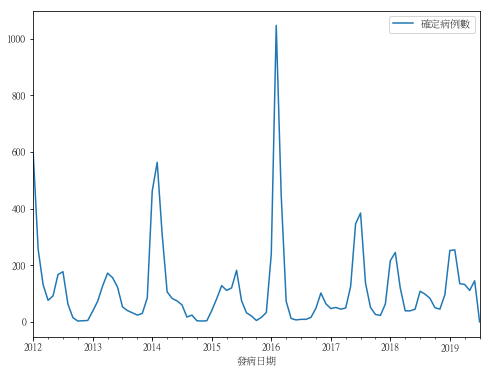

In [164]:
flu_data.plot(kind = 'line', figsize = [8,6])

In [167]:
dataset = flu_data['確定病例數'].values

In [168]:
len(dataset)

91

In [169]:
X_train = []
y_train = []
for i in range(12, 91):
    X_train.append(dataset[i-12:i])
    y_train.append(dataset[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [170]:
X_train2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [171]:
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [172]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [177]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train2, y_train, epochs = 100, batch_size = 3)

Epoch 1/100
79/79 [==============================] - 1s 7ms/step - loss: 13508.8363
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 12959.5576
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 13123.1906
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 13729.1140
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 13459.9065
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 12434.6724
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 12932.1342
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 12773.1921
Epoch 9/100
79/79 [==============================] - 1s 7ms/step - loss: 12818.3616
Epoch 10/100
79/79 [==============================] - 1s 7ms/step - loss: 12864.1446
Epoch 11/100
79/79 [==============================] - 1s 7ms/step - loss: 13190.4212
Epoch 12/100
79/79 [==============================] - 1s 7ms/step - loss: 

79/79 [==============================] - 1s 7ms/step - loss: 10828.0134
Epoch 98/100
79/79 [==============================] - 1s 7ms/step - loss: 10942.8755
Epoch 99/100
79/79 [==============================] - 1s 7ms/step - loss: 12823.7485
Epoch 100/100
79/79 [==============================] - 1s 7ms/step - loss: 11228.7233


In [179]:
predicted = regressor.predict(X_train2)

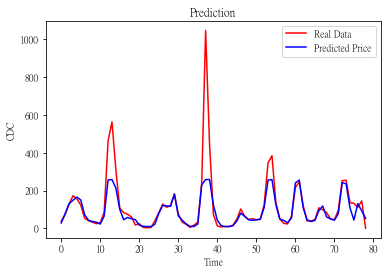

In [180]:
import matplotlib.pyplot as plt
plt.plot(dataset[12:],   color = 'red', label = 'Real Data')
plt.plot(predicted, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('CDC')
plt.legend()
plt.show()

## ARIMA

In [181]:
! pip install pmdarima

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [186]:
from pmdarima import auto_arima 
auto_arima(flu_data['確定病例數'],error_action='ignore').summary()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -562.223
Date:                Fri, 05 Jul 2019   AIC                           1140.446
Time:                        11:23:29   BIC                           1160.533
Sample:                             0   HQIC                          1148.550
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     60.0142     39.801      1.508      0.132     -17.994     138.023
ar.L1          0.2512      0.280      0.896      0.370      -0.298       0.800
ar.L2          0.7274      0.237      3.074      0.002       0.264       1.191
ar.L3         -0.4923      0.256     -1.927      0.054      -0.993       0.008
ma.L1          0.4146      0.433      0.957      0.339      -0.435       1.264
ma.L2         -0.9190      0.219     -4.189      0.000      -1.349      -0.489
ma.L3         -0.3336      0.343     -0.973      0.331      -1.006       0.339
sigma2      1.659e+04    3.3e-05   5.02e+08      0.000    1.66e+04    1.66e+04
===================================================================================
Ljung-Box (Q):                       32.78   Jarque-Bera (JB):              1465.10
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             3.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        21.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.59e+28. Standard errors may be unstable.
"""

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(flu_data['確定病例數'],order=(3,0,3), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  確定病例數   No. Observations:                   91
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -538.726
Date:                Fri, 05 Jul 2019   AIC                           1091.451
Time:                        11:24:09   BIC                           1108.713
Sample:                    01-01-2012   HQIC                          1098.402
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2123      0.262      8.456      0.000       1.699       2.725
ar.L2         -1.6634      0.506     -3.285      0.001      -2.656      -0.671
ar.L3          0.4512      0.292      1.544      0.122      -0.121       1.024
ma.L1         -1.5458      0.418     -3.696      0.000      -2.366      -0.726
ma.L2          0.1495      0.533      0.280      0.779      -0.895       1.194
ma.L3          0.3998      0.326      1.227      0.220      -0.239       1.038
sigma2      1.616e+04   6778.378      2.384      0.017    2872.415    2.94e+04
===================================================================================
Ljung-Box (Q):                       25.33   Jarque-Bera (JB):              2488.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             3.91
Prob(H) (two-sided):                  0.26   Kurtosis:                        28.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [199]:
start=0
end=len(flu_data)
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,0,3) Predictions')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


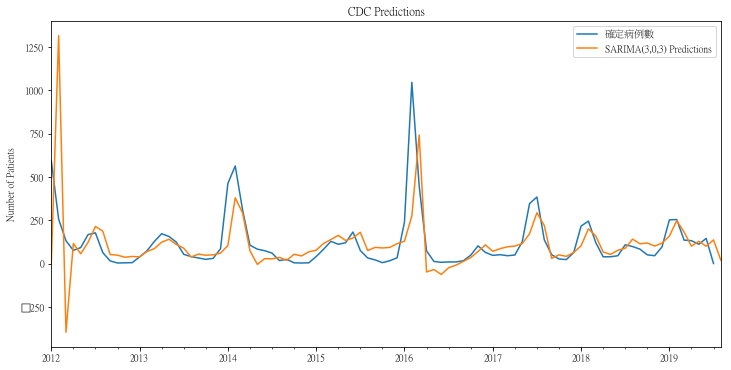

In [200]:
title='CDC Predictions'
ylabel='Number of Patients'
xlabel=''

ax = flu_data['確定病例數'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [203]:
from sklearn.metrics import mean_squared_error
mean_squared_error(flu_data['確定病例數'],predictions[1:])

17873.088238000564

In [193]:
predictions2 = results.predict(start=len(flu_data), end=len(flu_data) + 12, dynamic=False, typ='levels').rename('SARIMA(3,0,3) Predictions')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


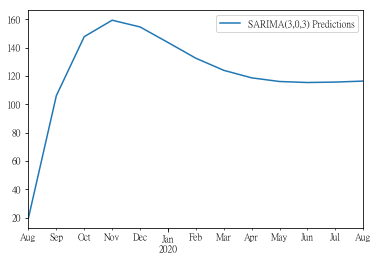

In [195]:
title='CDC Predictions'
ylabel='Number of Patients'
xlabel=''
predictions2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## 多變量時間序列預測 (使用 LSTM)

In [204]:
from pandas import read_csv
from datetime import datetime

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [205]:
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'xlabel', 'ylabel', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


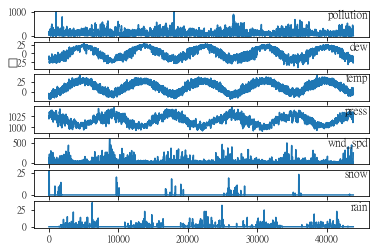

In [206]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [207]:
import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [208]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

In [211]:
from sklearn.preprocessing import MinMaxScaler
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [213]:
scaled[0:3]

array([[0.12977867, 0.35294122, 0.24590163, 0.5272732 , 0.6666667 ,
        0.00229001, 0.        , 0.        ],
       [0.14889336, 0.36764708, 0.24590163, 0.5272732 , 0.6666667 ,
        0.00381099, 0.        , 0.        ],
       [0.15995975, 0.4264706 , 0.22950819, 0.545454  , 0.6666667 ,
        0.00533197, 0.        , 0.        ]], dtype=float32)

In [214]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [217]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [219]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


In [220]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 8), (8760,), (35039, 1, 8), (35039,))

In [221]:

import keras
from keras import layers


model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

In [222]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 2s - loss: 0.0627 - val_loss: 0.0551
Epoch 2/50
 - 1s - loss: 0.0430 - val_loss: 0.0604
Epoch 3/50
 - 1s - loss: 0.0272 - val_loss: 0.0529
Epoch 4/50
 - 1s - loss: 0.0183 - val_loss: 0.0451
Epoch 5/50
 - 1s - loss: 0.0162 - val_loss: 0.0297
Epoch 6/50
 - 1s - loss: 0.0152 - val_loss: 0.0202
Epoch 7/50
 - 1s - loss: 0.0149 - val_loss: 0.0176
Epoch 8/50
 - 1s - loss: 0.0147 - val_loss: 0.0170
Epoch 9/50
 - 1s - loss: 0.0147 - val_loss: 0.0155
Epoch 10/50
 - 1s - loss: 0.0147 - val_loss: 0.0154
Epoch 11/50
 - 1s - loss: 0.0148 - val_loss: 0.0151
Epoch 12/50
 - 1s - loss: 0.0145 - val_loss: 0.0146
Epoch 13/50
 - 1s - loss: 0.0145 - val_loss: 0.0145
Epoch 14/50
 - 1s - loss: 0.0146 - val_loss: 0.0143
Epoch 15/50
 - 1s - loss: 0.0145 - val_loss: 0.0147
Epoch 16/50
 - 1s - loss: 0.0147 - val_loss: 0.0142
Epoch 17/50
 - 1s - loss: 0.0145 - val_loss: 0.0140
Epoch 18/50
 - 1s - loss: 0.0145 - val_loss: 0.0139
Epoch 19/50
 - 1s - loss

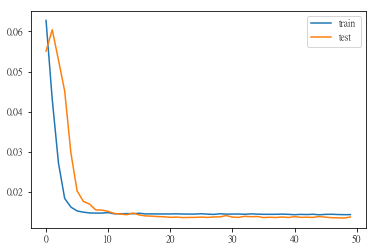

In [223]:

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [224]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [225]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [226]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.557


In [227]:
inv_y

array([31., 20., 19., ..., 10.,  8., 12.], dtype=float32)

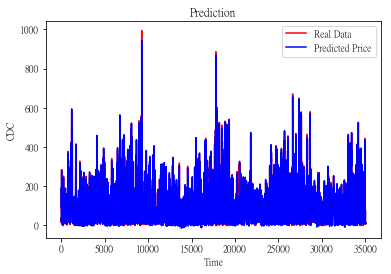

In [232]:
import matplotlib.pyplot as plt
plt.plot(inv_y,   color = 'red', label = 'Real Data')
plt.plot(inv_yhat, color = 'blue', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('CDC')
plt.legend()
plt.show()

## 文字生成
- https://github.com/ywchiu/tibamedl/blob/master/RNN/Generating%20Text%20with%20LSTM.ipynb